
# Titanic Classification

Dataset : [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic).
Building a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python.

## Import Libraries
Let's import some libraries to get started!

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [48]:
# Load data 
train = pd.read_csv('/workspaces/Bharat_DS_Internship/Titanic_Classifier/train.csv')

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! 

We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [50]:
train.shape

(891, 12)

In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

#### Let's take a look at correlation of each feature through heatmap

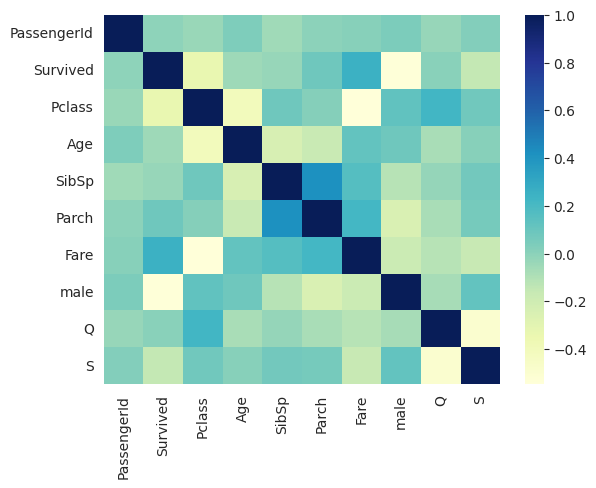

In [100]:
sns.heatmap(train.corr(), cmap = 'YlGnBu')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

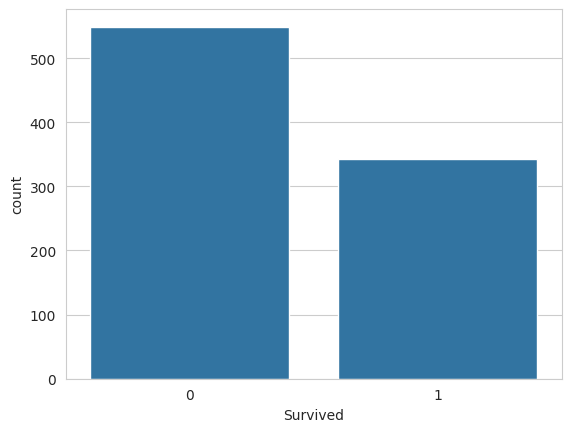

In [53]:
# count of survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

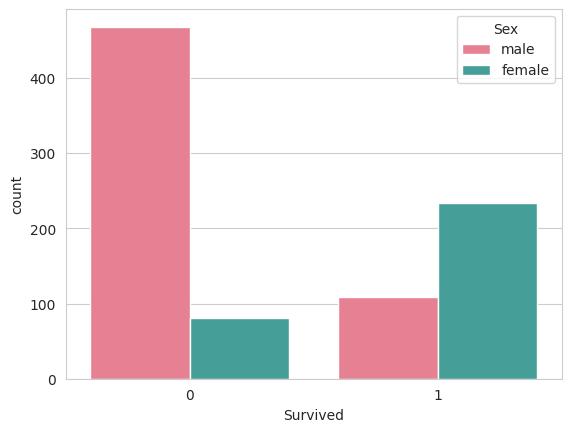

In [54]:
# count of survived with respect to gender
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='husl')

<Axes: xlabel='Survived', ylabel='count'>

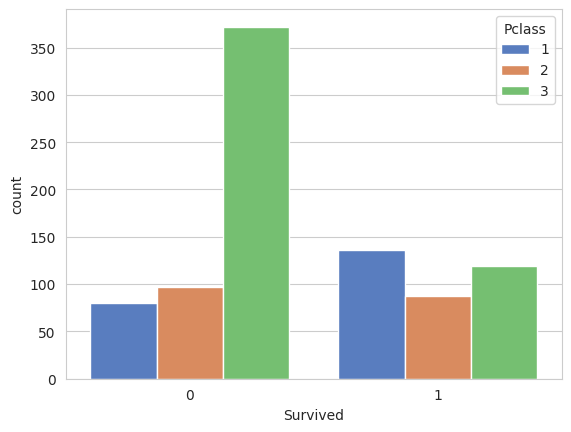

In [55]:
# count of survived with respect to passenger class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='muted')

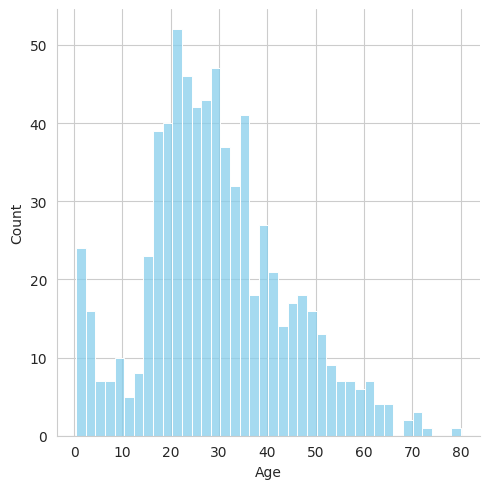

In [56]:
# Distribution of age
sns.displot(train['Age'].dropna(),kde=False,color='skyblue',bins=40)

<Axes: >

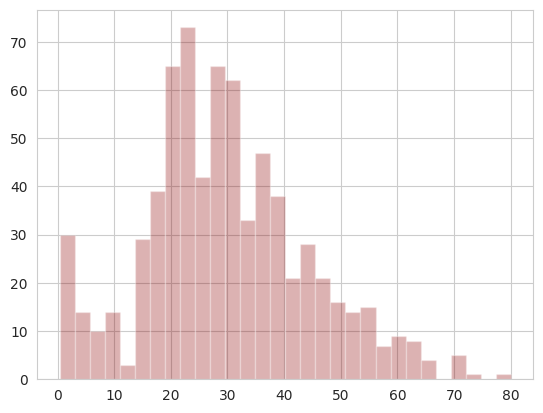

In [57]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

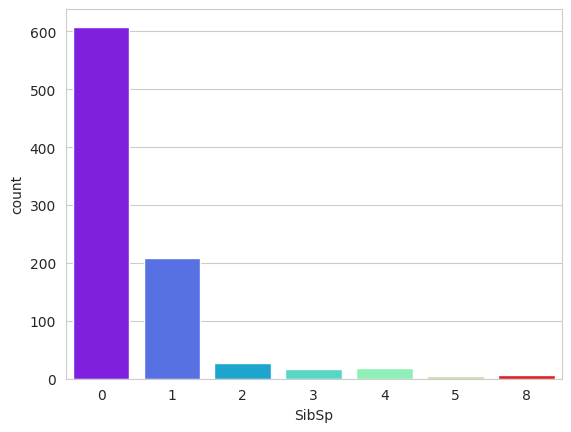

In [58]:
# count of Sibling or spouse
sns.countplot(x='SibSp',hue='SibSp',data=train,legend=False,palette='rainbow')

<Axes: >

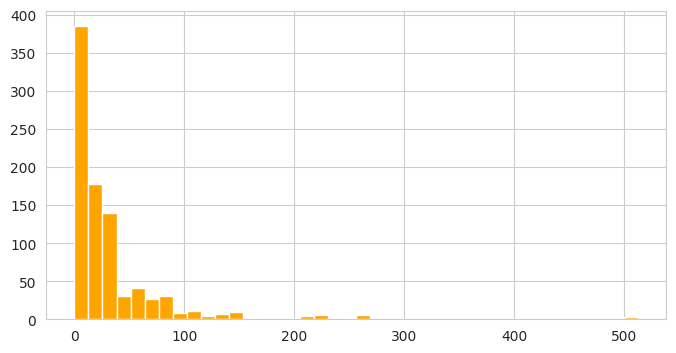

In [59]:
# Distribution of Fare
train['Fare'].hist(color='orange',bins=40,figsize=(8,4))

In [ ]:
# most of the tickets brought are under fare 100 and very few are on higher side of the fare

<Axes: ylabel='Frequency'>

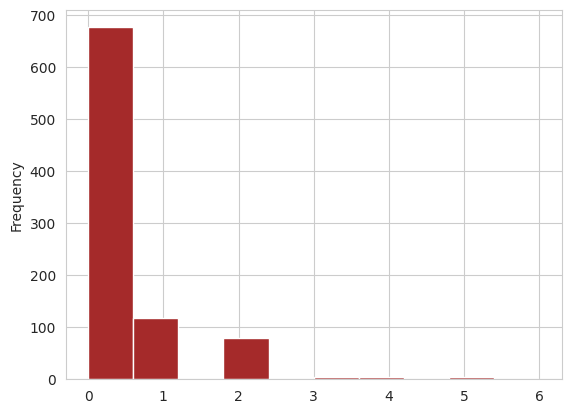

In [107]:
train['Parch'].plot.hist(color='brown')

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<Axes: >

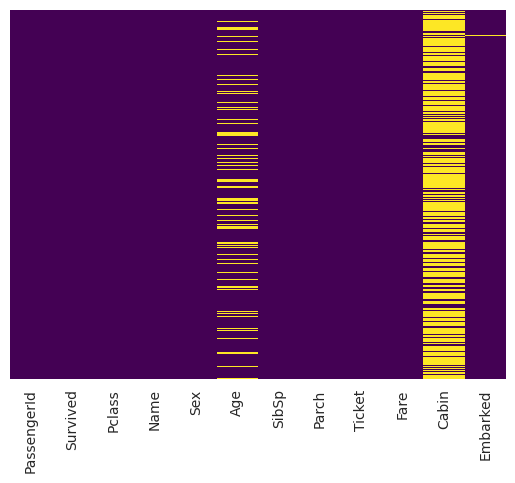

In [52]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/tmp/ipykernel_52904/1683851715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

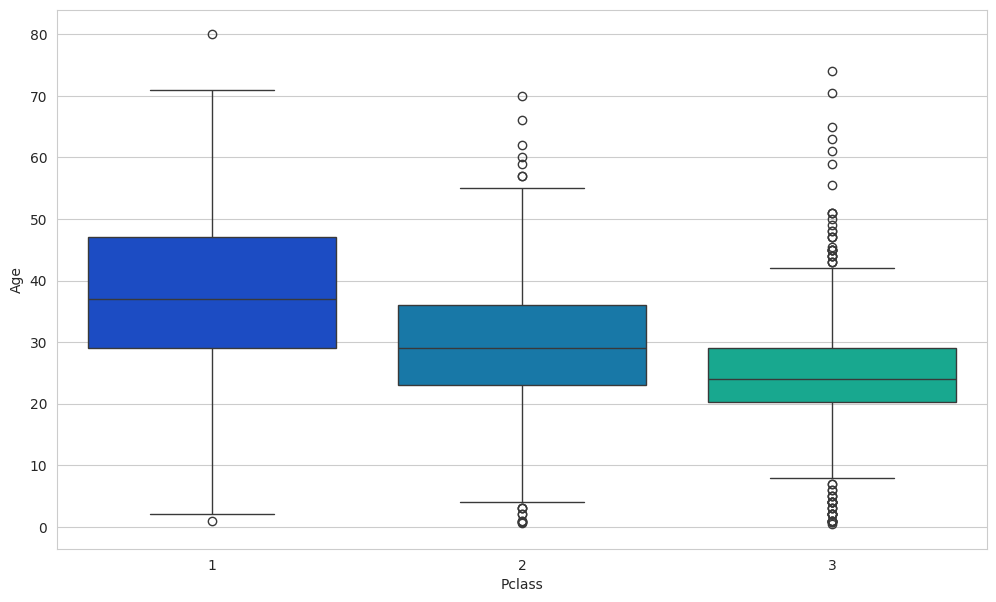

In [109]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

Now apply that function!

In [63]:
def impute_age(age, pclass):
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [64]:
train['Age'] = train[['Age', 'Pclass']].apply(lambda x: impute_age(x['Age'], x['Pclass']), axis=1)

Now let's check that heat map again!

<Axes: >

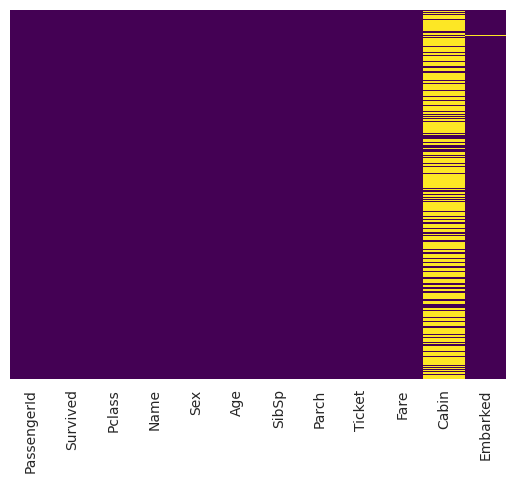

In [65]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [66]:
train.drop('Cabin',axis=1,inplace=True)

In [110]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [67]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [68]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [69]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [70]:
#pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [71]:
#sex = pd.get_dummies(train['Sex'],drop_first=True)
#embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [72]:
#train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [73]:
#train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [74]:
#train = pd.concat([train,sex,embark],axis=1)

In [75]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [76]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [77]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [78]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [79]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

## Training and Predicting

In [80]:
#import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [81]:
# Fit the Logistic Regression model with scaled data
# Use the 'liblinear' solver
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

In [82]:
predictions = logmodel.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix

In [84]:
accuracy=confusion_matrix(y_test,predictions)

In [85]:
accuracy

array([[151,  12],
       [ 36,  68]])

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8202247191011236

In [88]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [89]:
from sklearn.metrics import classification_report

In [90]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



##### For LogisticRegression we split the train dataset into train and test, but for further models we will try using separate test dataset as test data.

# RandomForestClassifier model

In [91]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

# Create and fit the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, predictions))


Accuracy: 0.8427
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       163
           1       0.84      0.74      0.79       104

    accuracy                           0.84       267
   macro avg       0.84      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267



# GradientBoostingClassifier

In [92]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

# Define and fit Gradient Boosting Machine model
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gbm_model.fit(X_train, y_train)

# Make predictions for all three models
gbm_predictions = gbm_model.predict(X_test)

# Evaluate model performance
print("--- Gradient Boosting ---")
print(f"Accuracy: {accuracy_score(y_test, gbm_predictions):.4f}")
print(classification_report(y_test, gbm_predictions))


--- Gradient Boosting ---
Accuracy: 0.8427
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       163
           1       0.83      0.75      0.79       104

    accuracy                           0.84       267
   macro avg       0.84      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



# DecisionTreeClassifier model

In [93]:

# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report 

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

# There is no need to 
# - import libraries again once it is imported.
# - split the data into train and test, This is just for neatness and understanding.

# Define and fit Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

# Make predictions for the model
dt_predictions = dt_model.predict(X_test)

# Evaluate model performance
print("--- Decision Tree ---")
print(f"Accuracy: {accuracy_score(y_test, dt_predictions):.4f}")

# Print classification report
print(classification_report(y_test, dt_predictions))

--- Decision Tree ---
Accuracy: 0.8127
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       163
           1       0.75      0.78      0.76       104

    accuracy                           0.81       267
   macro avg       0.80      0.81      0.80       267
weighted avg       0.81      0.81      0.81       267



# SupportVectorClassifier model

In [94]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)

# Define and fit Support Vector Machine model
svm_model = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_model.fit(X_train, y_train)

# Make predictions for the model
svm_predictions = svm_model.predict(X_test)

# Evaluate model performance
print("--- Support Vector Machine ---")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")

# Print classification report
print(classification_report(y_test, svm_predictions))

--- Support Vector Machine ---
Accuracy: 0.6067
              precision    recall  f1-score   support

           0       0.61      0.99      0.76       163
           1       0.00      0.00      0.00       104

    accuracy                           0.61       267
   macro avg       0.30      0.50      0.38       267
weighted avg       0.37      0.61      0.46       267



In [95]:
#Testing on the following classifiers
classifiers = [LogisticRegression(solver='liblinear'), 
               RandomForestClassifier(),
               GradientBoostingClassifier(),
               DecisionTreeClassifier(), 
               SVC()]
for cls in classifiers:
    cls.fit(X_train, y_train)

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LogisticRegression", 1: "RandomForest", 2: "GradientBoosting",3: "DecisionTreeClassifier",4: "SVC"}

In [96]:
from sklearn.model_selection import cross_val_score

# Crossvalidation 
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LogisticRegression: 0.797619 


RandomForest: 0.811982 
GradientBoosting: 0.816871 
DecisionTreeClassifier: 0.734793 
SVC: 0.639836 


In [97]:
# Model Evaluation
from sklearn import metrics
# creating lists of varios scores
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
  
    #Appending scores
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    trainset_accuracy.append(train_accuracy)
    testset_accuracy.append(test_accuracy)


In [98]:
# initialise data of lists.
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
# Creates pandas DataFrame.
Results = pd.DataFrame(data, index =["LogisticRegression","RandomForest","GradientBoosting","DecisionTreeClassifier","SVC"])

In [99]:
from matplotlib.colors import ListedColormap

cmap2 = ListedColormap(["#E2CCFF","#E598D8"])
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
LogisticRegression,0.850000,0.653846,0.739130,0.632959,0.641479
RandomForest,0.838710,0.750000,0.791878,0.632959,0.641479
GradientBoosting,0.827957,0.740385,0.781726,0.632959,0.641479
DecisionTreeClassifier,0.679612,0.673077,0.676329,0.632959,0.641479
SVC,0.800000,0.076923,0.140351,0.632959,0.641479
